In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]  # Width, Height in inches
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error , confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import  svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 1000

# Generate synthetic data
data = {
    'id': range(1, n_samples + 1),
    'age': np.random.randint(21, 65, size=n_samples),
    'education_level': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], size=n_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'job_title': np.random.choice(['Engineer', 'Scientist', 'Manager', 'Analyst'], size=n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'department': np.random.choice(['R&D', 'HR', 'Sales', 'Marketing'], size=n_samples, p=[0.4, 0.2, 0.2, 0.2]),
    'location': np.random.choice(['New York', 'San Francisco', 'Chicago', 'Boston'], size=n_samples, p=[0.25, 0.25, 0.25, 0.25]),
    'employment_duration': np.random.randint(1, 30, size=n_samples),
}

# Generate salary based on age, education level, job title, and employment duration
def generate_salary(row):
    base_salary = 30000
    education_bonus = {
        'High School': 5000,
        'Bachelors': 10000,
        'Masters': 20000,
        'PhD': 30000
    }
    job_title_bonus = {
        'Engineer': 15000,
        'Scientist': 20000,
        'Manager': 25000,
        'Analyst': 10000
    }
    experience_bonus = row['employment_duration'] * 1000

    return base_salary + education_bonus[row['education_level']] + job_title_bonus[row['job_title']] + experience_bonus

df = pd.DataFrame(data)
df['salary'] = df.apply(generate_salary, axis=1)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv('synthetic_employee_data.csv', index=False)


    id  age education_level  job_title department       location  \
0  830   56     High School   Engineer        R&D         Boston   
1  728   26       Bachelors   Engineer        R&D        Chicago   
2  850   51     High School   Engineer  Marketing  San Francisco   
3  199   33     High School  Scientist        R&D        Chicago   
4  282   38         Masters  Scientist        R&D       New York   

   employment_duration  salary  
0                   14   64000  
1                    7   62000  
2                   13   63000  
3                   12   67000  
4                   14   84000  


In [3]:
# Load the dataset from the CSV file
df = pd.read_csv('synthetic_employee_data.csv')

In [4]:
df.head()

,id,age,education_level,job_title,department,location,employment_duration,salary
0,830,56,High School,Engineer,R&D,Boston,14,64000
1,728,26,Bachelors,Engineer,R&D,Chicago,7,62000
2,850,51,High School,Engineer,Marketing,San Francisco,13,63000
3,199,33,High School,Scientist,R&D,Chicago,12,67000
4,282,38,Masters,Scientist,R&D,New York,14,84000


In [5]:
# Display the number of missing values in the dataset
print(df.isnull().sum())

id                     0
age                    0
education_level        0
job_title              0
department             0
location               0
employment_duration    0
salary                 0
dtype: int64


In [6]:
df = pd.get_dummies(df, columns=['education_level', 'job_title', 'department', 'location'], drop_first=True)


In [7]:
df.head()

,id,age,employment_duration,salary,education_level_High School,education_level_Masters,education_level_PhD,job_title_Engineer,job_title_Manager,job_title_Scientist,department_Marketing,department_R&D,department_Sales,location_Chicago,location_New York,location_San Francisco
0,830,56,14,64000,1,0,0,1,0,0,0,1,0,0,0,0
1,728,26,7,62000,0,0,0,1,0,0,0,1,0,1,0,0
2,850,51,13,63000,1,0,0,1,0,0,1,0,0,0,0,1
3,199,33,12,67000,1,0,0,0,0,1,0,1,0,1,0,0
4,282,38,14,84000,0,1,0,0,0,1,0,1,0,0,1,0


In [8]:
df.columns

Index(['id', 'age', 'employment_duration', 'salary',
       'education_level_High School', 'education_level_Masters',
       'education_level_PhD', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Scientist', 'department_Marketing', 'department_R&D',
       'department_Sales', 'location_Chicago', 'location_New York',
       'location_San Francisco'],
      dtype='object')

In [9]:
X = df.drop(columns=['id', 'salary'])
y = df['salary']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Training a Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)
rf_score = rf_model.score(X_test_scaled, y_test)

print(f"\nRandom Forest Model R^2 Score: {rf_score:.2f}")


Random Forest Model R^2 Score: 0.99


In [13]:
# Predict the labels for the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print(f"Confusion Matrix:\n{cm}")
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]

Accuracy: 0.02


# Using other regression models such as Linear Regression

In [15]:
liner_model = LinearRegression()

In [16]:
liner_model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
liner_model_score = liner_model.score(X_test_scaled, y_test)
print(f"\nLinear Regression Model R^2 Score: {liner_model_score:.2f}")


Linear Regression Model R^2 Score: 1.00


Performed well with 1.0 R^2 score

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = liner_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")


Mean Squared Error: 0.00


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(liner_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {scores.mean():.2f} +/- {scores.std():.2f}")


Cross-validation scores: 1.00 +/- 0.00


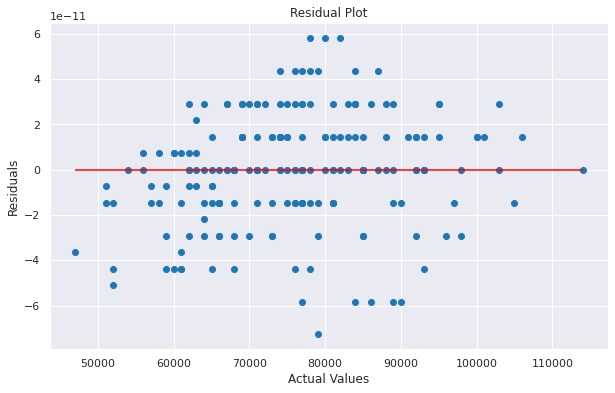

In [20]:
import matplotlib.pyplot as plt

# Example: Residual plot
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

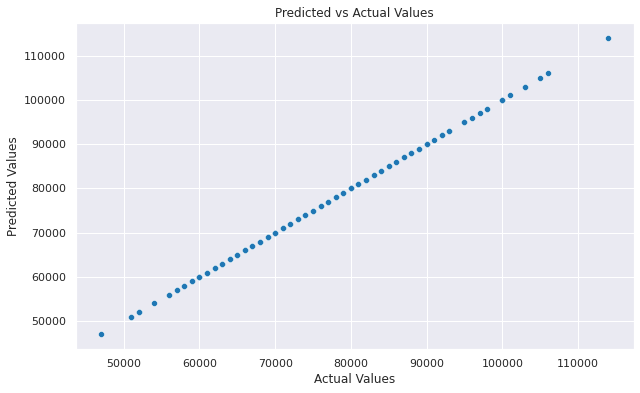

In [21]:
# Plot the predicted vs actual values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [22]:
# Let us try to predict the salary: new_employee = np.array([30, 5, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]) 

new_employee = np.array([30, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])
predicted_salary = liner_model.predict([new_employee])
print(f"\nPredicted Salary: ${predicted_salary[0]:.2f}")


Predicted Salary: $120466.80


In [23]:
C = 1.0  # SVM regularization parameter
results = {}

models = {
    'SVM Linear': svm.SVC(kernel='linear', C=C),
    'SVM RBF': svm.SVC(kernel='rbf', gamma=0.7, C=C),
    'SVM Poly': svm.SVC(kernel='poly', degree=3, C=C)
}

for name, model in models.items():
    clf = model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    results[name] = score  # Store the results

results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)

        Model  Accuracy
0  SVM Linear      0.13
1     SVM RBF      0.05
2    SVM Poly      0.05


It seems that the SVM models are not performing well on the dataset. This could be due to the fact that the dataset is not suitable for classification tasks. 

## Another exercice using Iris dataset

### Exercise: Iris Species Classification

1. **Load the Iris dataset**: This dataset is included in the `sklearn` library.
2. **Explore the dataset**: Understand its structure and content.
3. **Preprocess the data**: Handle any missing values, if any.
4. **Split the dataset**: Create training and testing sets.
5. **Train a classification model**: Use a classifier like Logistic Regression, K-Nearest Neighbors (KNN), or Random Forest.
6. **Evaluate the model**: Check the accuracy, confusion matrix, and classification report.
7. **Visualize the results**: Plot confusion matrix and decision boundaries if applicable.


In [24]:
# Load the Iris dataset
data_iris = load_iris()

In [25]:
# Display the dataset description
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
# Display the target names
df_iris['species'] = data_iris.target

In [26]:
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [27]:
# Display the number of missing values in the dataset
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [28]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [29]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


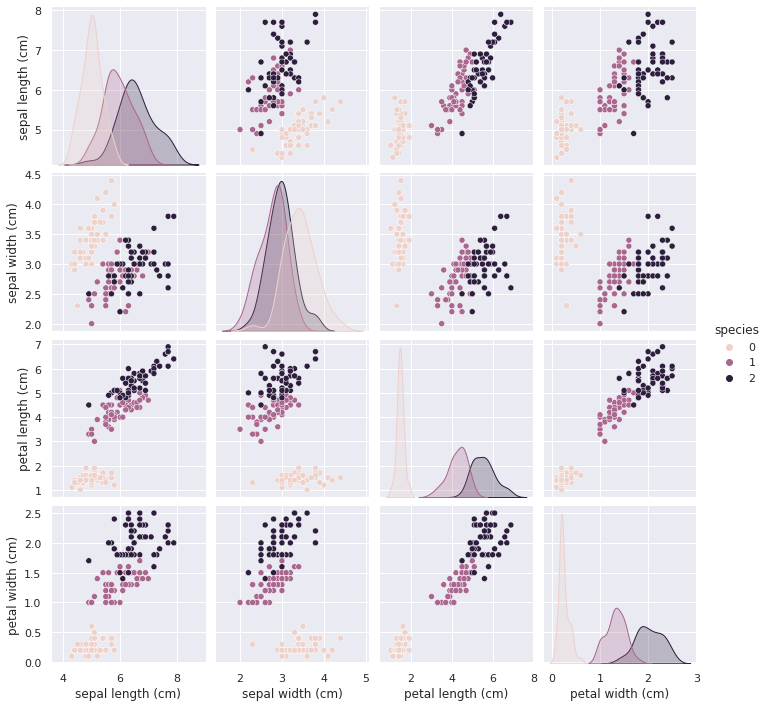

In [30]:
sns.pairplot(df_iris, hue='species')

<AxesSubplot:>

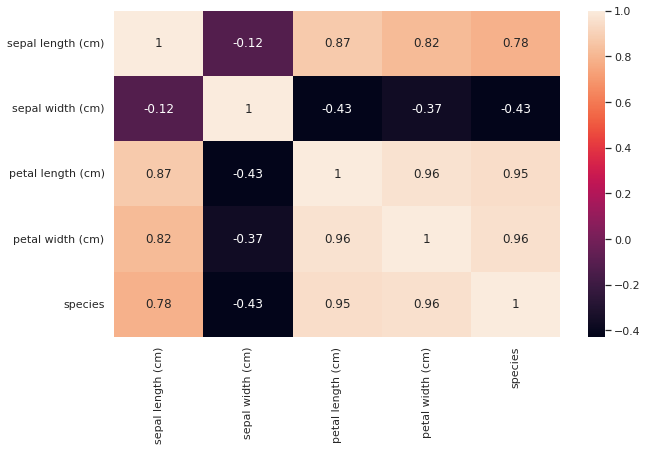

In [31]:
sns.heatmap(df_iris.corr(), annot=True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

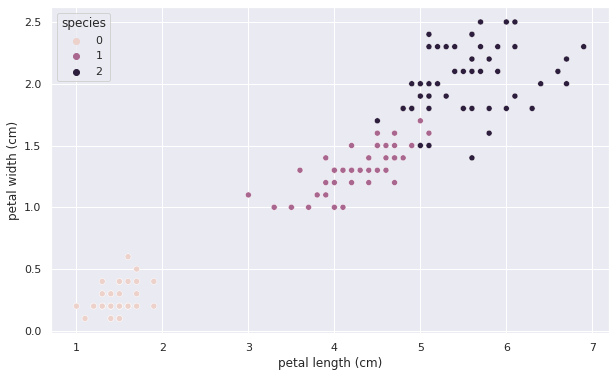

In [32]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=df_iris)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

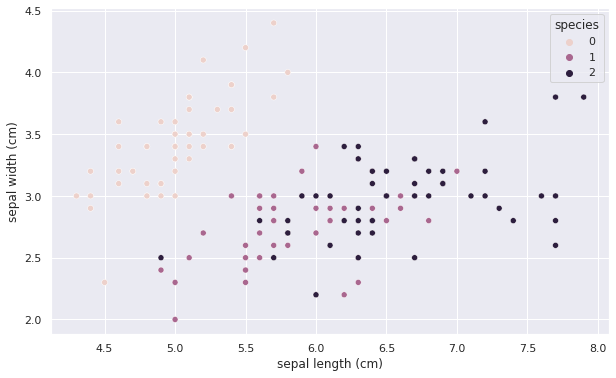

In [33]:
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="species", data=df_iris)

In [34]:
df_iris = df_iris[df_iris['species'] < 2]

In [35]:
train, test = train_test_split(df_iris, test_size=0.2) # 80-20 split

In [36]:
train


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
58,6.6,2.9,4.6,1.3,1
48,5.3,3.7,1.5,0.2,0
5,5.4,3.9,1.7,0.4,0
85,6.0,3.4,4.5,1.6,1
31,5.4,3.4,1.5,0.4,0
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
99,5.7,2.8,4.1,1.3,1
83,6.0,2.7,5.1,1.6,1
30,4.8,3.1,1.6,0.2,0


In [37]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
77,6.7,3.0,5.0,1.7,1
47,4.6,3.2,1.4,0.2,0
97,6.2,2.9,4.3,1.3,1
51,6.4,3.2,4.5,1.5,1
72,6.3,2.5,4.9,1.5,1
17,5.1,3.5,1.4,0.3,0
37,4.9,3.6,1.4,0.1,0
32,5.2,4.1,1.5,0.1,0
74,6.4,2.9,4.3,1.3,1
9,4.9,3.1,1.5,0.1,0


In [38]:
train_2d = train.iloc[:, [2, 3, 4]] # Select the petal_length, petal_width, and species columns
test_2d = test.iloc[:, [2, 3, 4]] # Select the petal_length, petal_width, and species columns

In [39]:
train_2d

,petal length (cm),petal width (cm),species
58,4.6,1.3,1
48,1.5,0.2,0
5,1.7,0.4,0
85,4.5,1.6,1
31,1.5,0.4,0
...,...,...,...
71,4.0,1.3,1
99,4.1,1.3,1
83,5.1,1.6,1
30,1.6,0.2,0


In [40]:
from sklearn.svm import LinearSVC

X_train = train_2d.iloc[:, :-1] #  this means all columns except the last one
y_train = train_2d.iloc[:, -1] #  this means only the last column

X_test = test_2d.iloc[:, :-1]
y_test = test_2d.iloc[:, -1]

model = LinearSVC(loss='squared_hinge', C=0.1)
trained = model.fit(X_train, y_train)

y_pred = trained.predict(X_test)

n_misclassified = (y_test != y_pred).sum()
print(n_misclassified)

0


<AxesSubplot:xlabel='Actuel class', ylabel='Predicted class'>

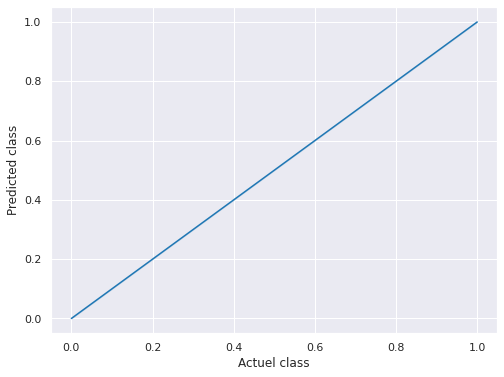

In [41]:
df_comparison = pd.DataFrame({'Actuel class': y_test,'Predicted class': y_pred})
plt.figure(figsize=(8, 6))

#sns.scatterplot(data=df_comparison, x="Actuel class", y="Predicted class")
#sns.lineplot(x=[0, 1], y=[0, 1], color='green', linestyle='--', label='Ideal')

sns.lineplot(data=df_comparison, x="Actuel class", y="Predicted class")


In [42]:
skl_params = [trained.coef_[0], trained.intercept_[0]]
skl_params

[array([0.37297606, 0.56677783]), -1.3787029188549755]

In [43]:
def custom_accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total
print(custom_accuracy(y_test, y_pred))

1.0


In [44]:
def wb2mq(w, b):
    assert len(w) == 2 # 2D data
    assert np.all(w != 0) and b != 0 # Non-zero values
    m = -w[0] / w[1]
    q = -b / w[1]
    return [m, q] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    print("m, q", m, q)
    print(f"Boudary line: y = {m: .2f}x + {q: .2f}")
    return lambda x: m*x + q

def plot_data(data,x,y,hues,**kwargs):
    sns.scatterplot(data=data, x=x, y=y, hue=hues, palette=sns.color_palette(["green", "orange"]))

def plot_model(model):
    x_spaces = np.linspace(1,5)
    sns.lineplot(x=x_spaces, y=model(x_spaces), color='black')

m, q -0.6580639452571972 2.432527958558777
Boudary line: y = -0.66x +  2.43


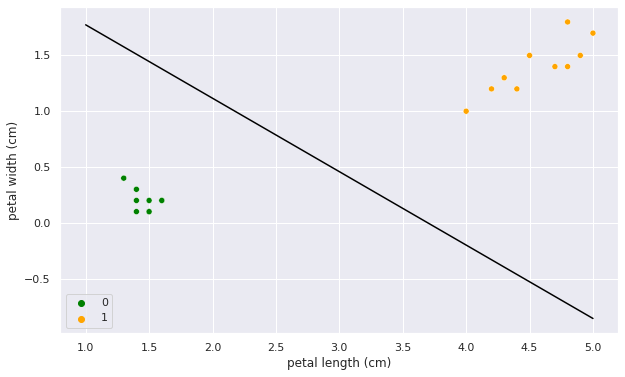

In [45]:
boundary = params2boundary(*skl_params) # splat operator to unpack the tuple
plot_data(test_2d,"petal length (cm)","petal width (cm)", "species")
plot_model(boundary)

# Using cross validation

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(df_iris, test_size=0.2, random_state=42) # 80-20 split
X = df_iris.drop(columns=['species'])
y = df_iris['species']


In [47]:
skf = StratifiedKFold(n_splits =10 , shuffle=True , random_state =42)

model_clf = {
    "SVM" : SVC(kernel="linear"),
    "SVM rbf" : SVC(kernel="rbf"),
    "Random Forest" : RandomForestClassifier(n_estimators=100),
    "K-NN": KNeighborsClassifier(n_neighbors = 3)
}

In [48]:
accuracies = {}
for name, model in model_clf.items():
    score = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    accuracies[name] = score

In [49]:
accuracies

{'SVM': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'SVM rbf': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Random Forest': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'K-NN': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [50]:
for name, cv_scores in accuracies.items():
    score = np.mean(cv_scores)
    print(f"Average accuracy for {name}: {score}")

Average accuracy for SVM: 1.0
Average accuracy for SVM rbf: 1.0
Average accuracy for Random Forest: 1.0
Average accuracy for K-NN: 1.0


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

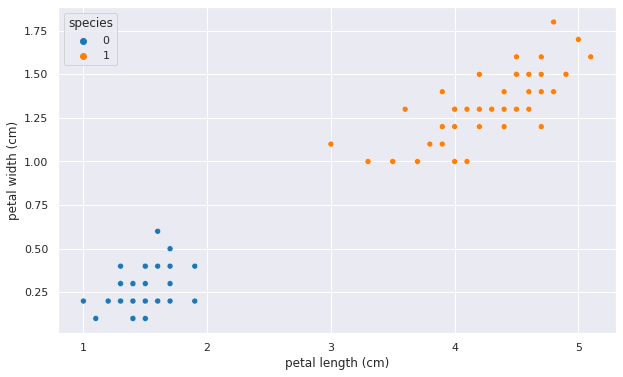

In [51]:
sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue="species", data=df_iris)

In [52]:
iris = load_iris()
X = iris.data[:, 0] # or iris.data[:, [0,1]] first two features
y = iris.target

X = X[y !=2]
y = y[y !=2]

np.where(y==0, -1, 1)


# Add a bias term (column of ones)
X_with_bias = np.c_[X, np.ones(X.shape[0])]

# Calculate theta using the normal equation for linear regression
theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

# Extract m and q from theta
m = -theta[0] / theta[1]
q = -theta[1] / theta[1]

print(f"Boundary line: y = {m:.2f}x + {q:.2f}")

Boundary line: y = 0.22x + -1.00


In [53]:
model_linear = lambda m,q: lambda x : m*x+q

def plot_model_and_date(model=None, text=None):
    ret = sns.scatterplot(x=X, y=y)
    if model is not None:
        sns.lineplot(x=X, y=[model(x) for x in X], color='black')
    if text is not None:
        plt.title(text)
        
    return ret
 

<AxesSubplot:title={'center':'m=0.22 q=-1.0'}>

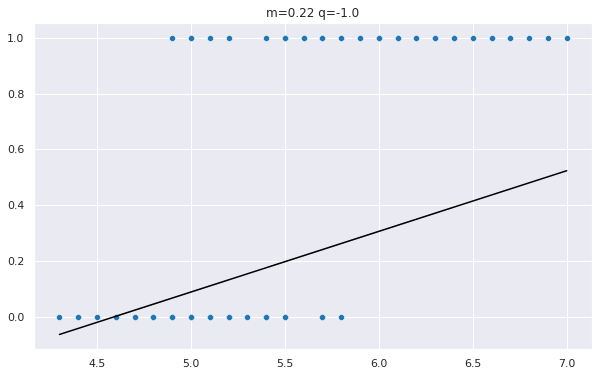

In [54]:
plot_model_and_date(model_linear(m,q), text=f"m={round(m, 2)} q={round(q, 2)}")  

# Non linear features with SVM 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a non-linear dataset (moon shapes)
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)
frame_data = pd.DataFrame(data=X)
frame_data['Target'] = y
frame_data.rename(columns={0: 'Feature 1', 1: 'Feature 2'}, inplace=True)
frame_data

,Feature 1,Feature 2,Target
0,1.647039,0.308835,1
1,0.351039,0.965041,0
2,0.490616,-0.270617,1
3,-0.941262,0.034721,0
4,0.584584,-0.387536,1
...,...,...,...
1995,0.224278,0.106369,1
1996,0.370106,-0.383130,1
1997,-0.967013,0.632713,0
1998,0.805933,-0.760113,1


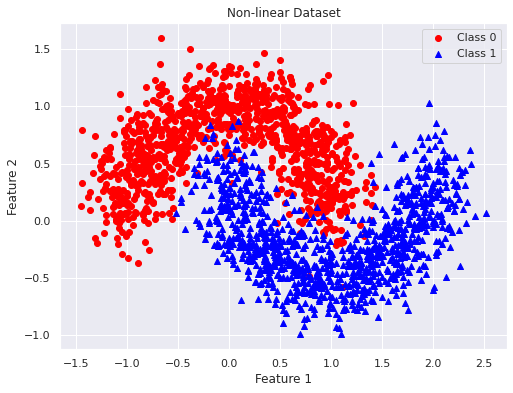

In [56]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='^', label='Class 1')
plt.title('Non-linear Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

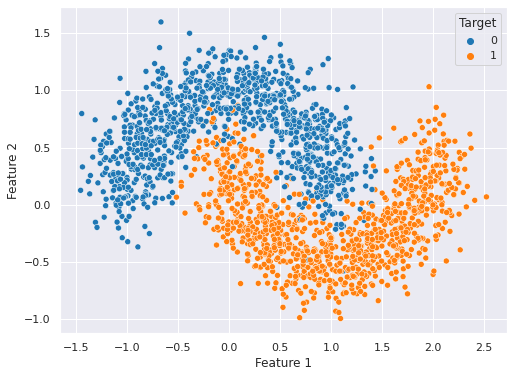

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=frame_data, x="Feature 1", y="Feature 2", hue="Target")

In [58]:
model = SVC(kernel='rbf', C= 1.0, gamma='scale')

In [59]:
model.fit(X,y)

SVC()

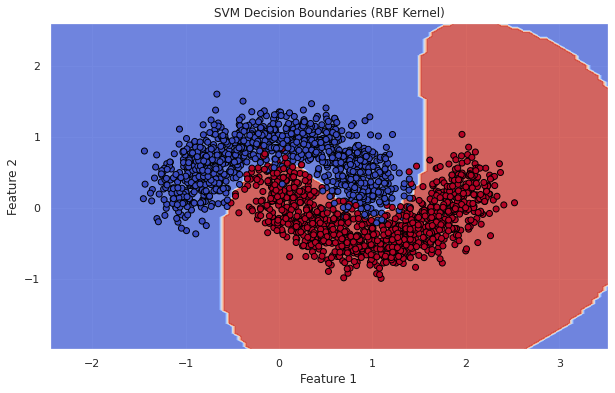

In [60]:
# this code can be reused 
# Create a meshgrid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundaries (RBF Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

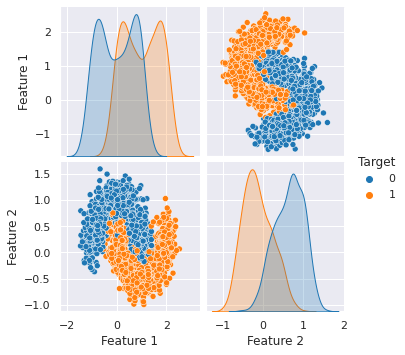

In [61]:
sns.pairplot(data=frame_data, hue="Target")